In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from scipy import io
from sklearn.mixture import GaussianMixture

rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [12, 12]

In [2]:
dogdata_w_mat = io.loadmat(os.path.join('..', 'datasets', 'dogData_w.mat'))
catdata_w_mat = io.loadmat(os.path.join('..', 'datasets', 'catData_w.mat'))

dog_wave = dogdata_w_mat['dog_wave']
cat_wave = catdata_w_mat['cat_wave']

CD = np.concatenate((dog_wave, cat_wave), axis=1)

u, s, vT = np.linalg.svd(CD - np.mean(CD), full_matrices=0)
v = vT.T

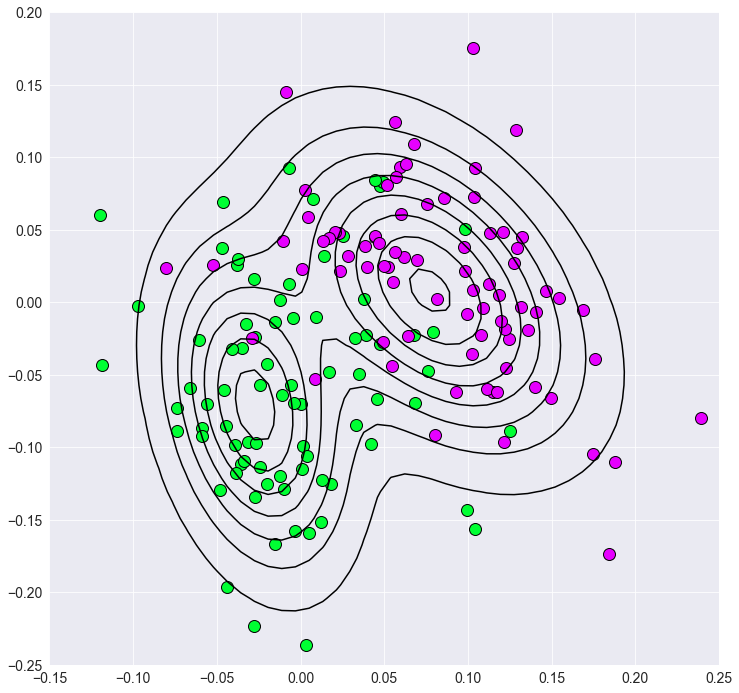

In [3]:
dogcat = v[:, (1, 3)]
GMModel = GaussianMixture(n_components=2).fit(dogcat)
AIC = GMModel.aic(dogcat)

plt.plot(v[:80, 1], v[:80, 3], 'ro', mfc=(0, 1, 0.2), mec='k', ms=12)
plt.plot(v[80:, 1], v[80:, 3], 'bo', mfc=(0.9, 0, 1), mec='k', ms=12)

x = np.linspace(-0.15, 0.25)
y = np.linspace(-0.25, 0.2)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = np.exp(GMModel.score_samples(XX))
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, levels=np.arange(3, 32, 4), colors='k', linestyles='solid')

plt.show()

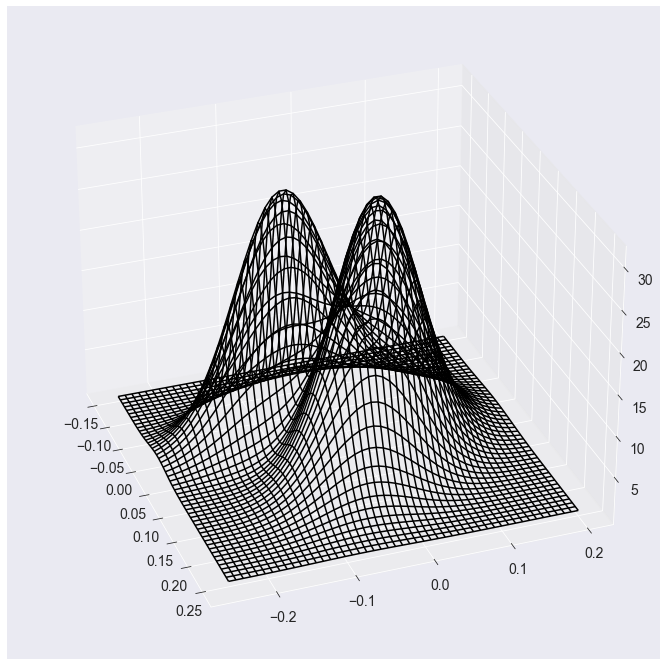

In [6]:
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.view_init(30, -20)
plt.show()